In [9]:
import pandas as pd
import datetime as dt

In [96]:
df = pd.read_csv('data/twitter-stocks.csv')

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0
5,2013-11-14,42.340000,45.669998,42.240002,44.689999,44.689999,11099433.0
6,2013-11-15,45.250000,45.270000,43.430000,43.980000,43.980000,8010663.0
7,2013-11-18,43.500000,43.950001,40.849998,41.139999,41.139999,12810624.0
8,2013-11-19,41.389999,41.900002,40.000000,41.750000,41.750000,7436616.0
9,2013-11-20,41.400002,41.750000,40.509998,41.049999,41.049999,5767325.0


## Plots

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
df.shape

(2259, 7)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df_recent = df[df['Date'].dt.year >= 2018] # use data from 2018 onwards

In [11]:
df_recent

,Date,Open,High,Low,Close,Adj Close,Volume
1044,2018-01-02,24.070000,24.570000,23.850000,24.510000,24.510000,15297229.0
1045,2018-01-03,24.559999,24.680000,24.070000,24.450001,24.450001,12832637.0
1046,2018-01-04,24.500000,24.590000,23.684999,23.990000,23.990000,17653544.0
1047,2018-01-05,24.070000,24.570000,23.879999,24.320000,24.320000,14953171.0
1048,2018-01-08,24.370001,24.780001,23.879999,24.590000,24.590000,17831260.0
...,...,...,...,...,...,...,...
2254,2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029.0
2255,2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553.0
2256,2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848.0
2257,2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973.0


In [97]:
#df_monthly = df.groupby([df.Date.dt.year, df.Date.dt.month])['Close'].mean()
df_monthly = df.groupby([df['Date'].rename("year").map(lambda t: t.year), df['Date'].rename("month").map(lambda t: t.month)])['Close'].mean()

AttributeError: 'str' object has no attribute 'year'

In [95]:
df_monthly = df_monthly.reset_index()

In [91]:
df_monthly['year_month'] = df_monthly['year'] + df_monthly['month']

In [92]:
sns.lineplot(df_monthly, x='year_month', y='Close')

ValueError: Could not interpret value `year_month` for parameter `x`

### Daily Line Plot: 2014 - 2022

<AxesSubplot: xlabel='Date', ylabel='Close'>

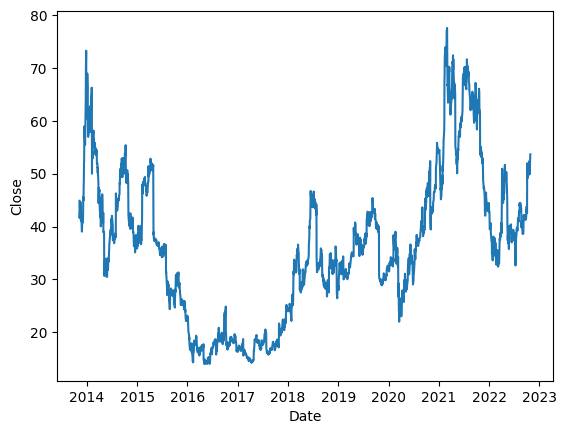

In [49]:
sns.lineplot(df, x='Date', y='Close')

### t vs t-1

In [76]:
df['Close_lag_1'] = df['Close'].shift(-1)

<AxesSubplot: xlabel='Close_lag_1', ylabel='Close'>

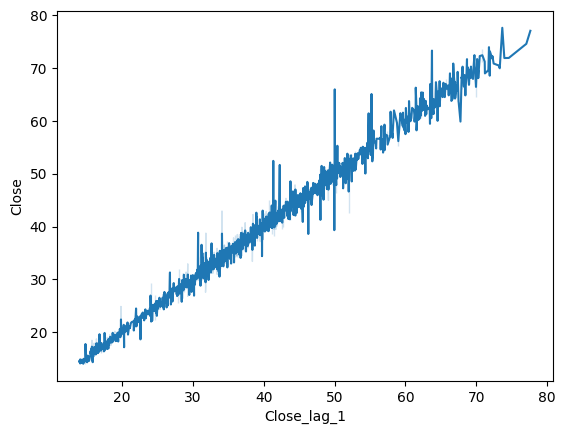

In [77]:
sns.lineplot(df, x='Close_lag_1', y='Close')

#### t vs t-1 is showing a clear upwards trend --> strong positive correlation

## Stationarity

### Dickey Fuller Test

In [65]:
from statsmodels.tsa.stattools import adfuller

In [60]:
df.index = df['Date']
del df['Date']
df = df[['Close']]
print(df.head(10))

                Close
Date                 
2013-11-07  44.900002
2013-11-08  41.650002
2013-11-11  42.900002
2013-11-12  41.900002
2013-11-13  42.599998
2013-11-14  44.689999
2013-11-15  43.980000
2013-11-18  41.139999
2013-11-19  41.750000
2013-11-20  41.049999


In [66]:
adft = adfuller(df,autolag="AIC")

In [67]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -2.135340              Test Statistics
1     0.230544                      p-value
2    15.000000             No. of lags used
3  2243.000000  Number of observations used
4    -3.433269          critical value (1%)
5    -2.862829          critical value (5%)
6    -2.567456         critical value (10%)


#### We see that our p-value is greater than 0.05. This implies that our data is not stationary. We will need to use differencing in order to attempt to convert our data into a stationary process

## Autocorrelation

In [68]:
autocorrelation_lag1 = df['Close'].autocorr(lag=1)
print("One Dat Lag: ", autocorrelation_lag1)

One Dat Lag:  0.9955142364847367


In [72]:
autocorrelation_lag3 = df['Close'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['Close'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['Close'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.986326416990641
Six Month Lag:  0.9733316660115076
Nine Month Lag:  0.9598782309705503


(array([-500, -499, -498, ...,  498,  499,  500]),
 array([0.55164085, 0.55219572, 0.55277942, ..., 0.55277942, 0.55219572,
        0.55164085]),
 <matplotlib.lines.Line2D at 0x1364694f0>)

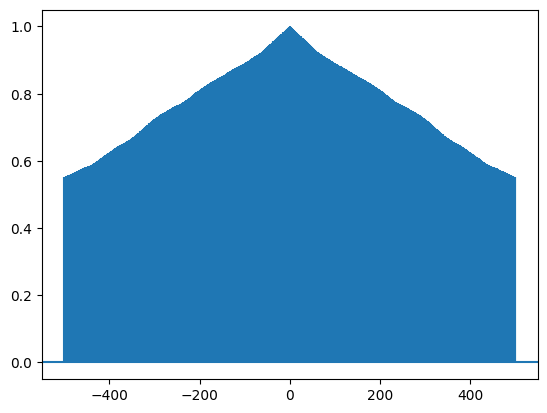

In [85]:
plt.acorr(df['Close'], maxlags = 500)

### Differencing

<AxesSubplot: xlabel='Date', ylabel='Close'>

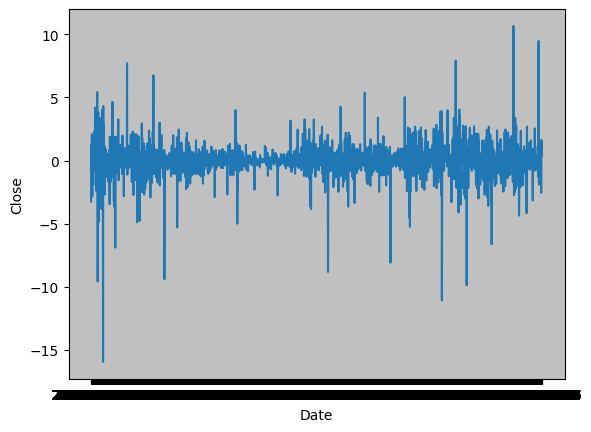

In [75]:
series2 = df.Close.diff().dropna() #first order differenced series
sns.lineplot(series2)

## Modelling

### Stationary Models

### Non-Stationary Models


#### Approaches

##### Box Jenkins
ACF, PACF, EACF --> find values for p, q

##### Dynamics Method


In [98]:
df.shape

(2259, 7)